<a href="https://colab.research.google.com/github/Elcejas77/Ejercicios/blob/main/Ejercicio_de_clase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#@title Librerías
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym



# *Conceptos básicos*



> **1.1.** Después de acondicionar las señales ilustradas en el presente cuaderno, simule un proceso de discretización con $F_s \geq 2 F_o.$ Dibuje el resultado de la señal discretizada utilizando la función **stem**.

**R/** La ecuación a discretizar es

$$x[t_k] = A \sin[w_o t + \phi]$$

$$x[t_k] = A \sin[2 \pi F_o t] = A \sin[2 \pi t / T_o ]$$


<ipython-input-17-37cb3fabece7>:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, x_tk, use_line_collection=True, linefmt='C6:',  markerfmt='C4o')


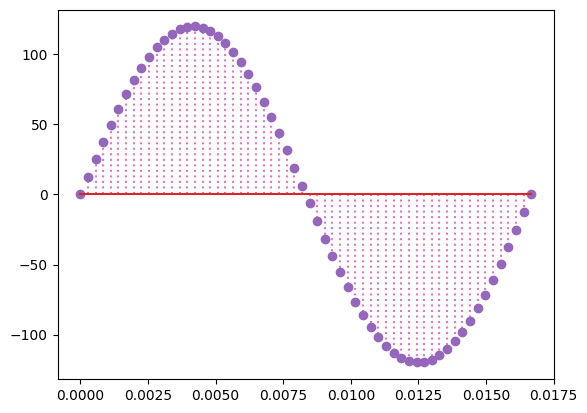

In [17]:
# Se crea un vector tiempo por rango y por número de muestras
M = 60 #int(input("ingrese el numero de muestras ")) # número de muestras que puede ser variable
T_o = 1/60 # periodo de la función sen
ti = 0 # tiempo incial referencia en segundos
tf = T_o # tiempo final en segundos
A = 120 # amplitud
tv = np.linspace(start=ti,stop=tf,num=M) # vector en donde se encuentran las 60 muestras
x_tk = A * np.sin(2*np.pi*tv/T_o) # vector de amplitud

# programación de la función stem

x = np.linspace(ti, tf, M) # periodo de muestreo

plt.stem(x, x_tk, use_line_collection=True, linefmt='C6:',  markerfmt='C4o')
plt.show()



> **1.2.** Consultar el funcionamiento de los métodos cdist y argmin.

**R/**

* Cdist: Esta función recibe dos arreglos y entrega la distancia entre los puntos de ambos arreglos utilizando la métrica que el usuario escoja.

* Argmin: Esta función recibe un arreglo, tiene la opción de que esta empiece a funcionar más adelante en el arreglo (no necesariamente tiene que empezar en la posición 0). Lo que hace es que analiza el arreglo y entrega el número de la posición en el que se encuentra el número de menor valor. Si se repite el valor mínimo más de una vez, entrega la primera posición encontrada.



> **1.3.** Realice una función mediante el ambiente def que permita realizar los procesos de discretización y cuantización (usando cdist y argmin) en cascada. Presente las gráficas de la señal original, señal con cero y pendiente, señal discretizada, y señal digital.

**R/** La ecuación a trabajar es la siguiente:

$$x[t_k] = A \cos[2 \pi F_o *t]$$

In [16]:
def my_ceropen(x,ymin = -5, ymax = 5):
  #Codigo base para simular proceso de cero y pendiente
  xmax = max(x) # x.max()                    #Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv  #funcion con valores max y min definidos

def discretizar_cuantizar_graficar(A,f,fs,nbits,ymaxima,yminima):
 #Definimos la función
 import numpy as np
 import matplotlib.pyplot as plt
 from scipy.spatial.distance import  cdist

 T_o=1/f           #Definiendo parametros para construir la señal
 ti=0
 tf=3*T_o
 k=500             #cantidad de muestras para la señal continua
 tv=np.linspace(ti,tf,k)
 xv = A * np.cos(2*f*np.pi*tv) #vector de amplitud
 yv=my_ceropen(xv,yminima,ymaxima)  #Definiendo un valor de amplitud máximo y mínimo
 #DISCRETIZACION
 n=np.arange(ti,tf,1/fs)  #Cantidad de Muestras
 xn=A*np.cos(2*np.pi*f*n) #Amplitud de muestras
 yn=my_ceropen(xn,yminima,ymaxima)   #Calculando 0 y pendiente para tener la funcion en los limites
 #CUANTIZACION
 rmin = yminima
 rmax = ymaxima
 ve = np.linspace(rmin,rmax,2**nbits) # Calcula la cantidad de cajones dado el numero de bits
 d = cdist(yn.reshape(-1,1),ve.reshape(-1,1)) #  calcula la distancia entre cada muestra y los intervalos de bits                                       ¨duda¨
 ind = np.argmin(d,axis=1) #calcula la mejor aproximación entre el valor real y el digital                                                              ¨duda¨
 #GRAFICAR
 plt.subplot(311)
 plt.plot(tv,xv,".r")
 plt.subplot(312)
 plt.plot(tv,yv,".y")
 plt.subplot(313)
 plt.stem(n,ve[ind])  #graficando las muestras de tiempo discreto contra la menor amplitud para cada caso

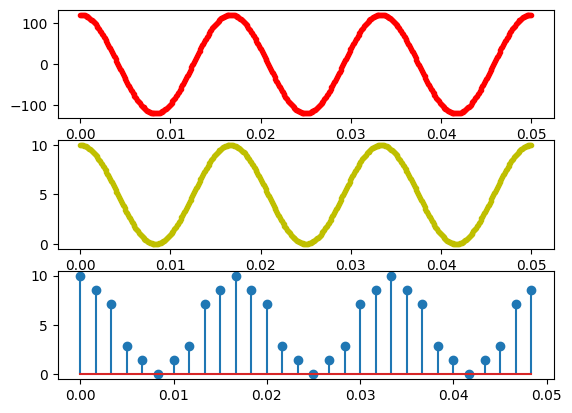

In [6]:
discretizar_cuantizar_graficar(120,60,600,3,10,0)